In [7]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import random
import matplotlib.pyplot as plt
import numpy as np
import time
np.set_printoptions(suppress=True,   precision=20,  threshold=10,  linewidth=40)
pd.set_option('display.float_format',lambda x : '%.3f' % x)

<AxesSubplot:>

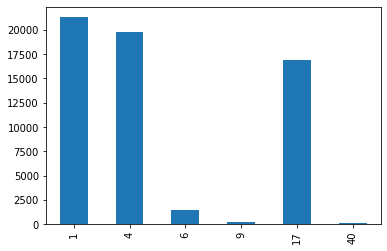

<AxesSubplot:>

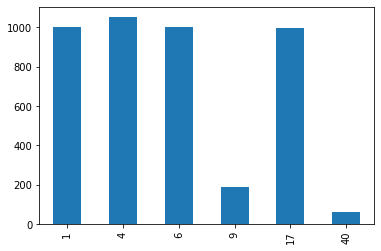

1     21330
4     19774
6      1476
9       226
17    16904
40       80
Name: prot_category, dtype: int64

1      999
4     1052
6      999
9      186
17     997
40      61
Name: prot_category, dtype: int64

,agg_sum,age_mean,rate
prot_category,,,
1,467997455.173,22486.553,0.048
4,17285008980.269,1644131.302,0.100
6,1737851452.786,1177309.393,0.677
9,4949263.970,26608.946,1.000
17,768044021.312,45435.638,0.059
40,69043865.850,1131866.653,1.000


,agg_sum,age_mean
prot_category,,
1,0.002,0.023
4,0.443,0.048
6,0.103,0.103
9,0.323,0.607
17,0.389,0.389
40,0.772,0.701


total error:0.32526185054561535


,agg_sum,age_mean
prot_category,,
1,468701779,21973.829
4,31010261238,1568234.107
6,1937001395,1312331.568
9,3741096,16553.522
17,1257766800,74406.460
40,302542408,3781780.100


,agg_sum,age_mean
prot_category,,
1,467997455.173,22486.553
4,17285008980.269,1644131.302
6,1737851452.786,1177309.393
9,4949263.970,26608.946
17,768044021.312,45435.638
40,69043865.850,1131866.653


In [8]:
origin=pd.read_csv("../datasets/sdr_flow_ter_15min00001.csv")
samples=pd.read_csv("../output/torch_cvae_sdr_flow_prot_category_ld128_id256_bs256_ep100_rate0.1_binary_gaussian15.csv")
group_col='prot_category'
agg_col='l4_ul_throughput'
origin_groups=origin[group_col].value_counts().sort_index()
origin_groups.plot(kind='bar')
plt.show()
samples_groups=samples[group_col].value_counts().sort_index()
samples_groups.plot(kind='bar')
plt.show()
origin_groups
samples_groups
origin_res=origin.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'))
samples_res=samples.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'),rate=('rate','mean'))

samples_res['agg_sum']=samples_res['agg_sum']/samples_res['rate']
samples_res
del samples_res['rate']
diff=(samples_res-origin_res).abs()/origin_res
diff.fillna(1, inplace=True)
diff
print("total error:{}".format(diff.values.sum()/diff.size))
origin_res
samples_res

-----------group val:4------------


(array([ 0.,  1.,  1., ..., 86., 77.,
        71.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

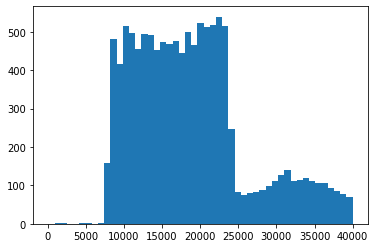

(array([1., 2., 2., ..., 7., 9., 6.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

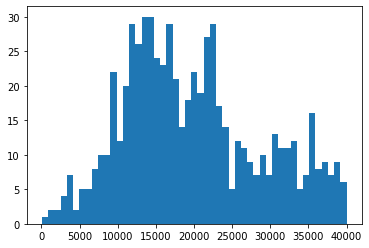

-----------group val:17------------


(array([  3.,   7.,   7., ..., 201.,
        201., 201.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

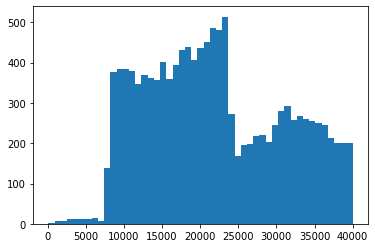

(array([ 0.,  1.,  3., ..., 13., 19.,
         6.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

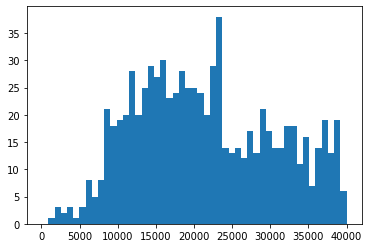

-----------group val:1------------


(array([  0.,   0.,   0., ..., 181.,
        146., 161.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

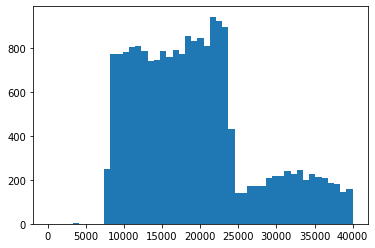

(array([ 0.,  0.,  0., ..., 15.,  8.,
         5.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

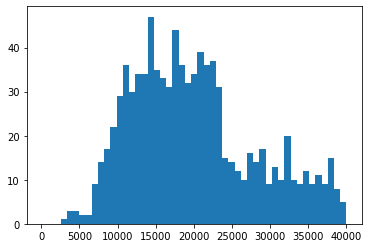

-----------group val:6------------


(array([0., 0., 0., ..., 2., 1., 1.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

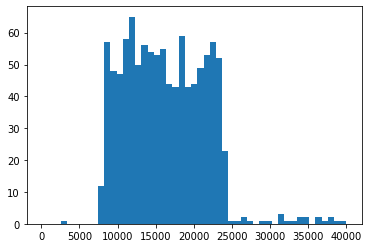

(array([0., 0., 1., ..., 3., 6., 2.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

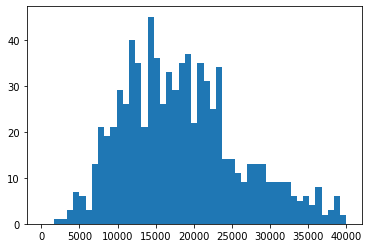

-----------group val:9------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

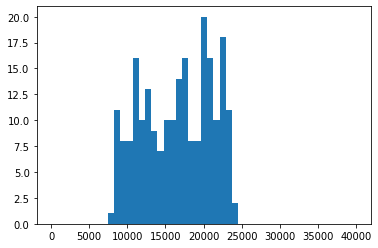

(array([0., 0., 1., ..., 0., 0., 2.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

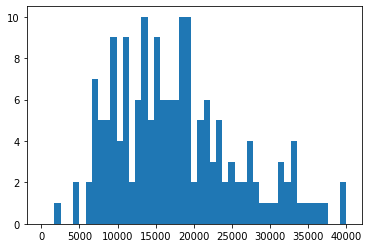

-----------group val:40------------


(array([0., 0., 0., ..., 0., 0., 0.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

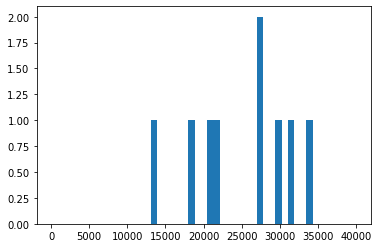

(array([0., 0., 0., ..., 0., 0., 1.]),
 array([  100.             ,
          914.2857142857143,
         1728.5714285714287, ...,
        38371.42857142857  ,
        39185.71428571429  ,
        40000.             ]),
 <BarContainer object of 49 artists>)

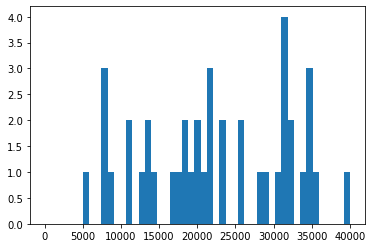

In [11]:
group_vals=origin[group_col].drop_duplicates(keep='first')
agg_range=(100,40000,24)
bin_num=50
for val in group_vals: 
    print('-----------group val:{}------------'.format(val))
    o_col=origin[origin[group_col]==val][agg_col]
    s_col=samples[samples[group_col]==val][agg_col]
    bins = np.linspace(agg_range[0], agg_range[1], bin_num)
    plt.hist(o_col.values.tolist(),bins)
    plt.show()
    plt.hist(s_col.values.tolist(),bins)
    plt.show()

In [9]:
group_col="prot_category"
agg_col="l4_ul_throughput"
start=time.perf_counter()
origin=pd.read_csv("../datasets/sdr_flow_ter_15min0001.csv")
origin_res=origin.groupby(by=group_col).agg({"l4_ul_throughput":['sum','mean'],"l4_dw_throughput":['sum','mean'],"l4_ul_packets":['sum','mean'],"l4_dw_packets":['sum','mean']})
origin_res
end=time.perf_counter()
print('query time:{}'.format(end - start))

l4_ul_throughput               l4_dw_throughput                 \
                           sum          mean              sum           mean   
prot_category                                                                  
1                   4726298647  2.225596e+04       4734497007   22294.569186   
4                 319633154519  1.617192e+06      55911339881  282884.839542   
6                  16595272766  1.072254e+06       2960009377  191252.140402   
9                     34509584  1.603605e+04         34432720   16000.334572   
17                 13073920514  7.714183e+04      18797075185  110910.939910   
40                  2432256578  3.110303e+06        469079182  599845.501279   

              l4_ul_packets                l4_dw_packets                 
                        sum           mean           sum           mean  
prot_category                                                            
1                 103487890     487.320600      55753652     262.541860  
4                  68023509     344.166666     134911147     682.586364  
6                  10131155     654.594237      19472655    1258.167280  
9                 327264184  152074.434944     327006214  151954.560409  
17                 60018711     354.136566     109017164     643.248804  
40                   289491     370.193095       1120637    1433.039642

query time:0.823644599999966
